In [2]:
import pandas as pd
import pickle
import nltk
import numpy as np

import TextCleaning
#For some reason LDAvariables did not run?
#import LDAvariables
import stanza
import gensim

In [6]:
# load saved df.  df['working_abstract'] contains clean text.
#df = pd.read_csv("../../data/original/working_federal_reporter_2020.csv")

#Decided to use the clean dataset from cleaning_updated 
df = pd.read_csv("../../src/cleaning_processing/FRAbstractsSqueakyClean.csv")
df.reset_index(inplace = True)
df.rename(columns={'index':'original index'}, inplace=True)

/apps/software/standard/compiler/gcc/7.1.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8,14,15,21,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
#This impacted some of the pre-processing stuff (creating lemmas, i think they all need to be strings/objects?)

#Which FY are we deciding to use? .X or .Y
df.dtypes

# omg
len(df)

1028720

In [8]:
#Check if IC Center exists
df['IC_CENTER'].value_counts()

NCI        74491
NIAID      50116
NIGMS      48011
NHLBI      42082
NIDDK      33206
NINDS      30989
NIA        24763
NIMH       23214
NICHD      22903
NIDA       16711
NEI        11847
NIEHS      11493
NIAMS      11020
VA          9540
NIAAA       8434
NIDCD       7967
NIBIB       6610
NIDCR       6128
NIMHD       4540
OD          4166
NHGRI       4075
FDA         3254
AHRQ        3193
ARS         3159
NINR        2762
NCATS       2753
FIC         2042
NCER        1640
NCCIH       1582
NLM         1564
NIOSH       1186
CLC          977
NCCDPHP      693
NCCAM        604
NCSER        493
NCBDD        355
NCIPC        345
ACF          234
NCIRD        209
COGH         194
NCHHSTP      192
CDC          164
CIT           88
NCEH          62
ATSDR         37
COTPER         9
NCHS           8
CID            2
OGDP           1
WH             1
Name: IC_CENTER, dtype: int64

In [ ]:
#Diference between FY.x and FY.y

In [16]:
df['FY.x'].value_counts()

2009.0    114947
2010.0    107326
2008.0    100616
2018.0     95800
2011.0     93867
2016.0     89490
2012.0     88861
2015.0     88456
2017.0     87960
2013.0     87372
2014.0     86527
2019.0     79880
Name: FY.x, dtype: int64

In [17]:
df['FY.y'].value_counts()

2009.0      118553
2010.0      111392
2008.0      104070
2011.0       98063
2018.0       96209
2012.0       93366
2015.0       92265
2013.0       91636
2016.0       91126
2014.0       90943
2017.0       88420
2019.0       80065
329831.0         1
20772.0          1
332527.0         1
7073.0           1
82071.0          1
599098.0         1
993326.0         1
79171.0          1
81405.0          1
320749.0         1
Name: FY.y, dtype: int64

In [10]:
#Drastically different - this was 34% in our old dataset

#Each row is a different project- no duplicate projects
len(df['CONTACT_PI_PROJECT_LEADER'].unique())
#Unique -Project Leaders 
len(df['CONTACT_PI_PROJECT_LEADER'].unique())/len(df) *100

19.242359436970215

In [11]:
def cleanProjectLeaders(c):
    if c ==",":
        return float("Nan")
    else:
        return c
df['CONTACT_PI_PROJECT_LEADER'] = df['CONTACT_PI_PROJECT_LEADER'].apply(cleanProjectLeaders)

NameError: name 'xlabel' is not defined

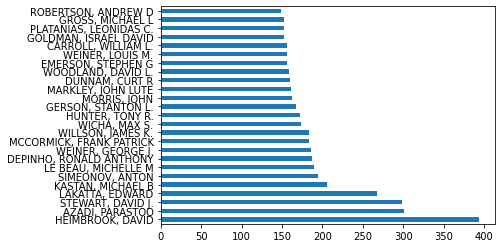

In [12]:
#Difference from old dataset: David Heimbrook wasn't listed as top in the other dataset - probably new

df['CONTACT_PI_PROJECT_LEADER'] =df['CONTACT_PI_PROJECT_LEADER'].dropna(how='any')
cfda_counts= df['CONTACT_PI_PROJECT_LEADER'].value_counts()[:25]
cfda_counts.plot(kind='barh')
xlabel('CONTACT_PI_PROJECT_LEADER')
ylabel('Frequency')
title('Top 25 Contact PI Project Leaders')

In [13]:
#This was 12% in the other dataset

#Each row is a different project- no duplicate projects
len(df['OTHER_PIS'].unique())
#Unique -Project Leaders 
len(df['OTHER_PIS'].unique())/len(df) *100

#df['OTHER_PIS'].value_counts()

7.143829224667549

NameError: name 'xlabel' is not defined

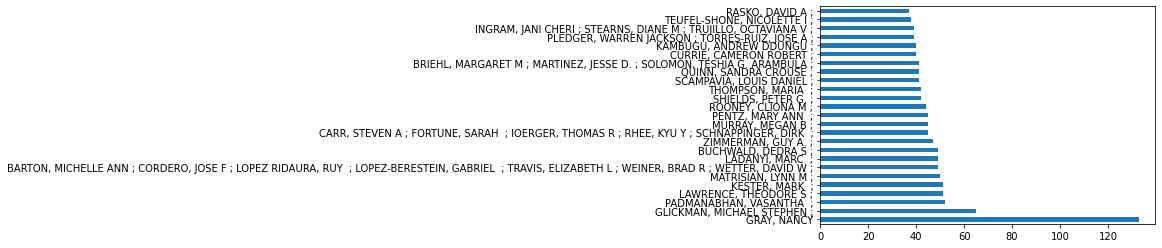

In [14]:
#similar to the other dataset
df['OTHER_PIS'] =df['OTHER_PIS'].dropna(how='any')
cfda_counts= df['OTHER_PIS'].value_counts()[:25]
cfda_counts.plot(kind='barh')
xlabel('OTHER_PIS')
ylabel('Frequency')
title('Top 25 Other PIS')

In [15]:
#Each row is a different project- no duplicate projects
len(df['ORGANIZATION_NAME'].unique())
#Unique -Project Leaders 
len(df['ORGANIZATION_NAME'].unique())/len(df) *100
df['ORGANIZATION_NAME'].value_counts()

NATIONAL INSTITUTES OF HEALTH             40420
THE JOHNS HOPKINS UNIVERSITY              20062
UNIVERSITY OF MICHIGAN AT ANN ARBOR       18373
UNIVERSITY OF CALIFORNIA SAN FRANCISCO    18012
UNIVERSITY OF PENNSYLVANIA                17663
                                          ...  
SPORTSGUARD LABORATORIES, INC.                1
HSTAR TECHNOLOGIES CO                         1
NEW FOLDER CONSULTING LLC                     1
CHEANG, U K                                   1
ALIVIO THERAPEUTICS INC                       1
Name: ORGANIZATION_NAME, Length: 16519, dtype: int64

NameError: name 'xlabel' is not defined

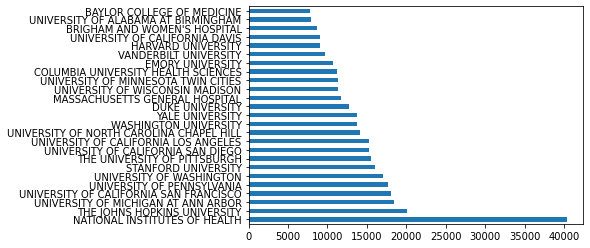

In [16]:
df['ORGANIZATION_NAME'] =df['ORGANIZATION_NAME'].dropna(how='any')
cfda_counts= df['ORGANIZATION_NAME'].value_counts()[:25]
cfda_counts.plot(kind='barh')
xlabel('ORGANIZATION NAME')
ylabel('Frequency')
title('Top 25 ORGANIZATIONS')

NameError: name 'title' is not defined

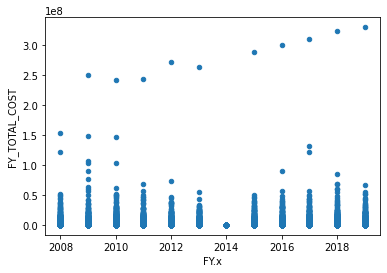

In [17]:
#Same trend with 2014
#would be interesting to see -what are these outlier projects? Are they the same field?
df.plot.scatter(x= "FY.x",y = "FY_TOTAL_COST")
title("Year by Year Total Cost Distribution")

NameError: name 'xlabel' is not defined

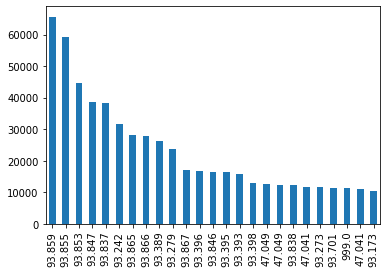

In [18]:
df['CFDA_CODE'].value_counts()
len(df['CFDA_CODE'])
df['CFDA_CODE'] =df['CFDA_CODE'].dropna(how='any')
cfda_counts= df['CFDA_CODE'].value_counts()[:25]
cfda_counts.plot(kind='bar')
xlabel('CFDA Code')
ylabel('Frequency')
title('Top 25 CFDA Codes')